# Exploratory Data Analysis(EDA)
### Abhiram MV
#### Task 5 - Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
#### As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. <br>Suggest teams or players a company should endorse for its products.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings #Ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
df_deliv = pd.read_csv('deliveries.csv')

In [3]:
df_match = pd.read_csv('matches.csv')

In [4]:
df_deliv

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [5]:
df_deliv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
df_deliv.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

#### There are many null values in 3 columns

In [7]:
df_deliv.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
df_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [9]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
df_match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### Missing values in umpire 3 column

In [11]:
df_match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


#### Analyzing the  data

In [12]:
df_match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [13]:
df_match.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

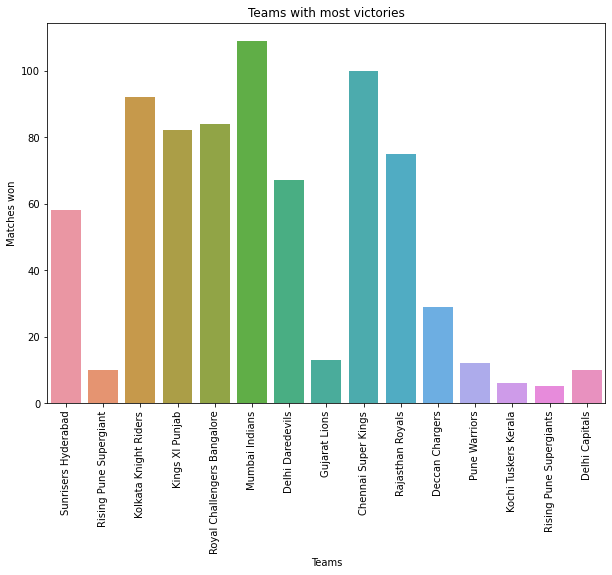

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(df_match.winner)
plt.xticks(rotation = 90)
plt.title('Teams with most victories')
plt.xlabel('Teams')
plt.ylabel('Matches won')
plt.show()

#### Mumbai Indians have won the most games

In [15]:
#some basic statistics
print("Number of matches played so far: ", df_match.shape[0])
print("Number of seasons: ", len(df_match.season.unique()))

Number of matches played so far:  756
Number of seasons:  12


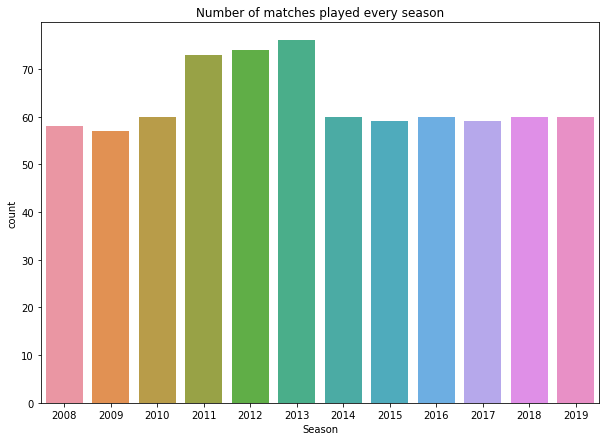

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(df_match.season)
plt.title('Number of matches played every season')
plt.xlabel('Season')
plt.show()

#### Most matches played in season 2013

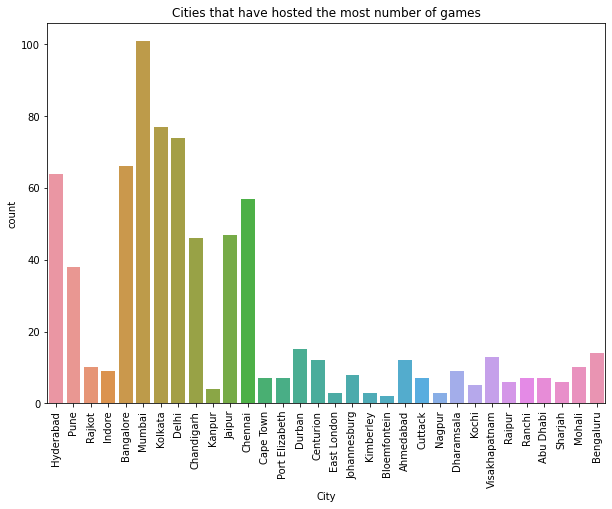

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(df_match.city)
plt.xticks(rotation=90)
plt.title('Cities that have hosted the most number of games')
plt.xlabel('City')
plt.show()

#### Most matches have been hosted in the city of Mumbai

In [18]:
df_match.city.value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Abu Dhabi           7
Cape Town           7
Ranchi              7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [19]:
temp_df = pd.melt(df_match, id_vars=['id','season'], value_vars=['team1', 'team2'])

In [20]:
temp_df

,id,season,variable,value
0,1,2017,team1,Sunrisers Hyderabad
1,2,2017,team1,Mumbai Indians
2,3,2017,team1,Gujarat Lions
3,4,2017,team1,Rising Pune Supergiant
4,5,2017,team1,Royal Challengers Bangalore
...,...,...,...,...
1507,11347,2019,team2,Mumbai Indians
1508,11412,2019,team2,Mumbai Indians
1509,11413,2019,team2,Delhi Capitals
1510,11414,2019,team2,Chennai Super Kings


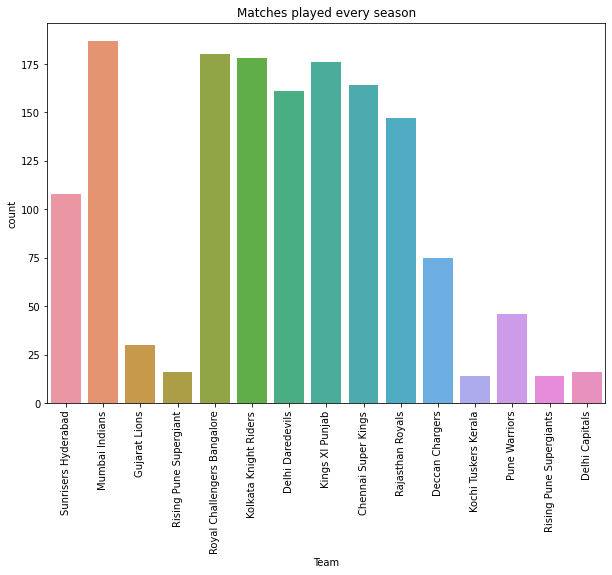

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(temp_df.value)
plt.title('Matches played every season')
plt.xlabel('Team')
plt.xticks(rotation='vertical')
plt.show()

#### Mumbai Indians have played the most number of games in the IPL so they have better experience

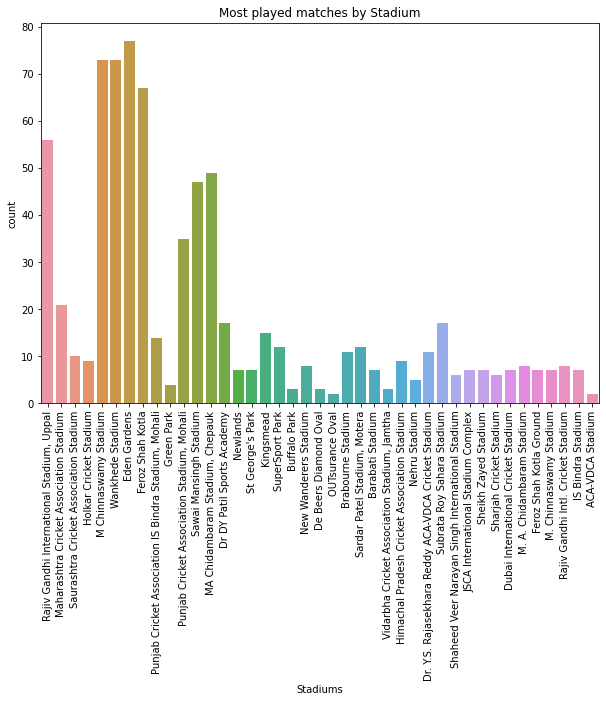

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(x='venue', data=df_match)
plt.title('Most played matches by Stadium')
plt.xlabel('Stadiums')
plt.xticks(rotation='vertical')
plt.show()

#### Eden Garden in West Bengal has hosted the most number of matches

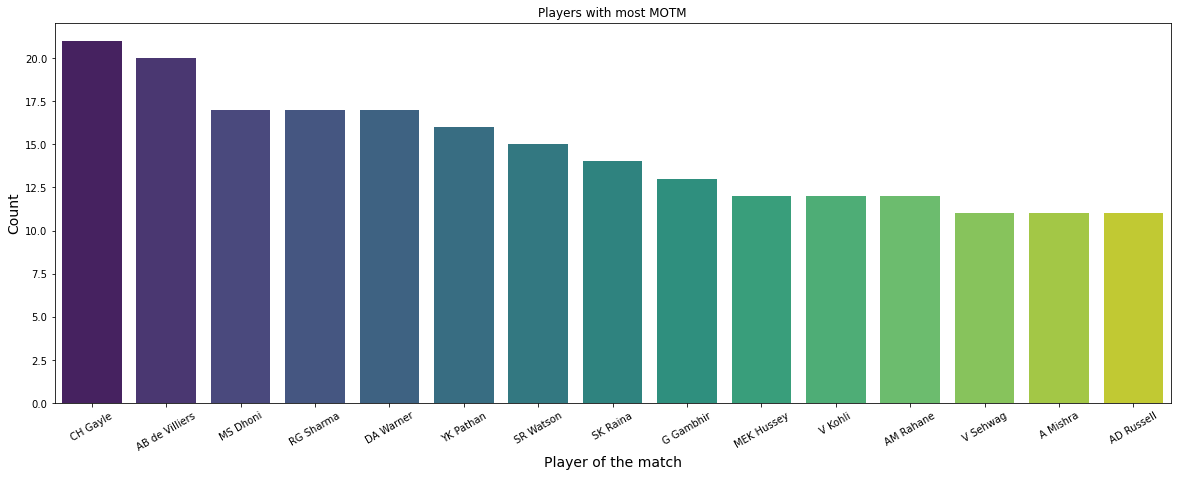

In [23]:
man_of_match=df_match['player_of_match'].value_counts()
man_of_match=man_of_match[:15]
plt.figure(figsize=(20,7))
man_of_matches=sns.barplot(man_of_match.index, man_of_match.values, palette='viridis')
plt.title('Players with most MOTM')
plt.ylabel('Count',fontsize=14)
plt.xlabel('Player of the match',fontsize=14)
man_of_matches.set_xticklabels(rotation=30,labels=man_of_match.index)
plt.show()

#### Chris Gayle has the most number of man of the match awards

#### Champions each season

In [24]:
df_match.drop_duplicates(subset=['season'],keep='last')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


But we care only about the winner

In [25]:
df_temp = df_match.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True).sort_values(by = 'season' )

In [26]:
df_temp

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


#### Mumbai Indians have the most number of IPL titles(4) and then Chennai Super Kings(3)

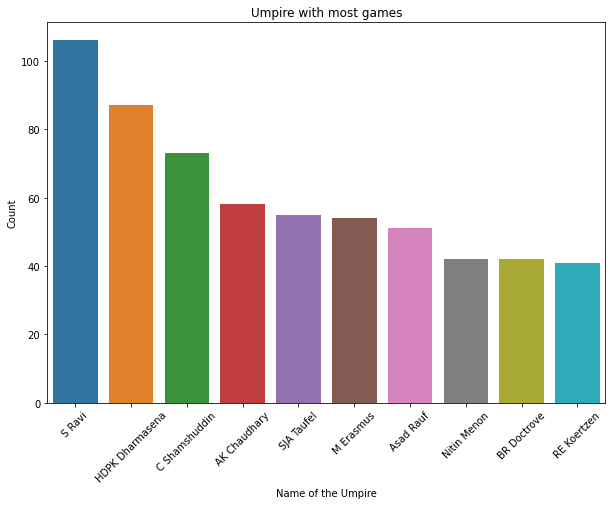

In [27]:
ump_df = pd.concat([df_match['umpire1'],df_match['umpire2']]).value_counts().sort_values(ascending=False)
ump_df=ump_df[:10]
plt.figure(figsize=(10,7))
Most_umpired =sns.barplot(x=ump_df.index, y=ump_df.values)
plt.title('Umpire with most games')
plt.ylabel('Count')
plt.xlabel('Name of the Umpire')
Most_umpired.set_xticklabels(rotation=45,labels=ump_df.index)
plt.show()          

#### S Ravi has umpired the most number of games

#### Toss Decisions

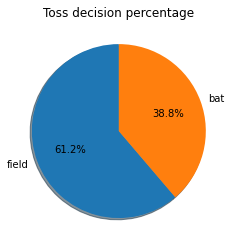

In [28]:
toss = df_match.toss_decision.value_counts()
labels = (toss.index)
sizes = (toss / toss.sum())*100
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=90,shadow=True)
plt.title("Toss decision percentage")
plt.show()

#### Most teams that win the toss chose to field first

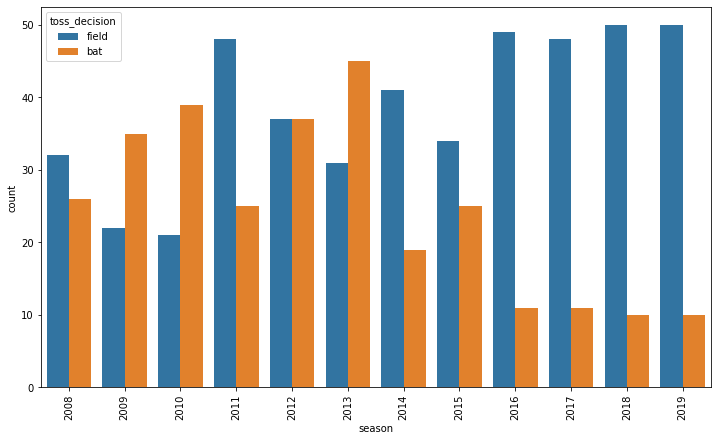

In [29]:
plt.figure(figsize=(12,7))
sns.countplot(x='season', hue='toss_decision', data=df_match)
plt.xticks(rotation='vertical')
plt.show()

#### Winning percentage of teams batting 2nd

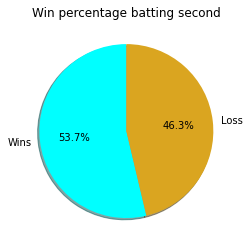

In [30]:
num_of_wins = (df_match.win_by_wickets>0).sum()
num_of_loss = (df_match.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = num_of_wins + num_of_loss
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90,colors=['cyan','goldenrod'])
plt.title("Win percentage batting second")
plt.show()

#### Most teams won batting second or chasing

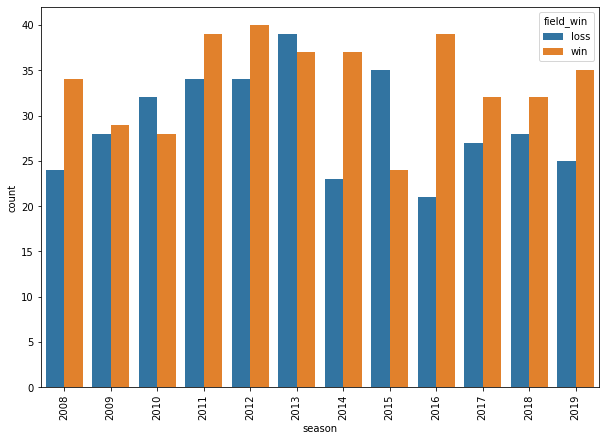

In [31]:
df_match["field_win"] = "win"
df_match["field_win"].iloc[df_match['win_by_wickets']==0] = "loss"
plt.figure(figsize=(10,7))
sns.countplot(x='season', hue='field_win', data=df_match)
plt.xticks(rotation=90)
plt.show()

Number of wins batting second is quit high

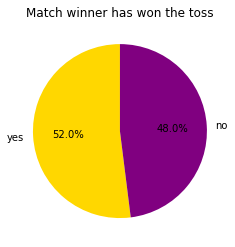

In [32]:
df_match['toss_winner_is_winner'] = 'no'
df_match['toss_winner_is_winner'].iloc[df_match.toss_winner == df_match.winner] = 'yes'
temp = df_match.toss_winner_is_winner.value_counts()

labels = temp.index
sizes = (temp / temp.sum())*100
colors = ['gold', 'purple']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%',startangle=90)
plt.title("Match winner has won the toss")
plt.show()

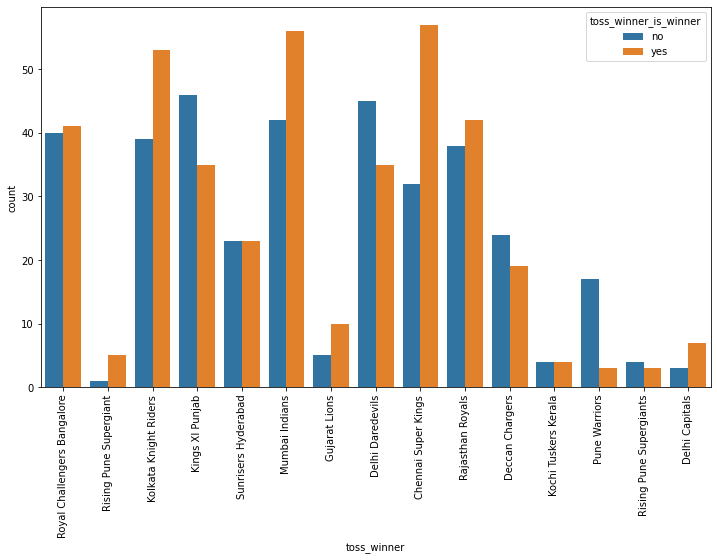

In [33]:
plt.figure(figsize=(12,7))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=df_match)
plt.xticks(rotation= 90)
plt.show()

#### Many teams that won the toss won the match

#### The Toss Decisions taken by Venue Heatmap

Text(0.5, 1.0, 'The Toss Decisions taken by Venue')

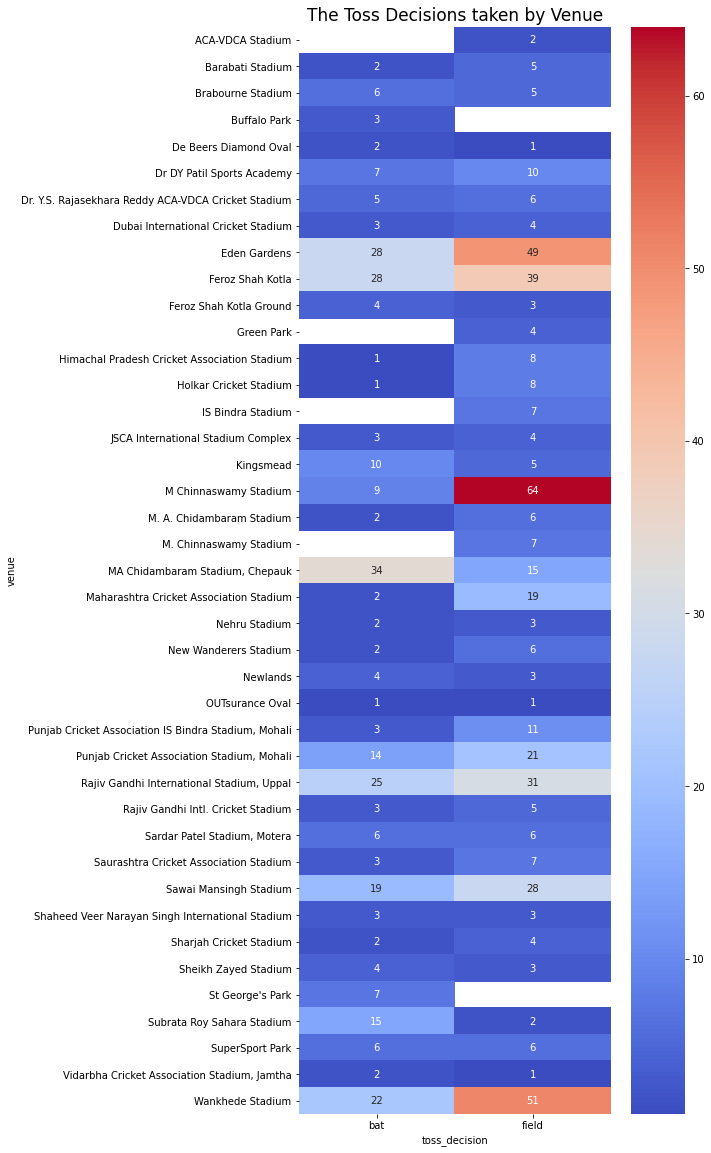

In [34]:
venue_toss=df_match.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='Toss Decision Counts')
heatmap_data = pd.pivot_table(venue_toss, values='Toss Decision Counts', index=['venue'],columns='toss_decision')
plt.figure(figsize=(7,20))
sns.heatmap(heatmap_data,annot=True,cmap='coolwarm')
plt.title('The Toss Decisions taken by Venue',size=17)

So far we have looked at the match data. Now let us look at the delivery dataset and analyze the data

In [35]:
df_deliv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Analyzing the Batsman

In [36]:
df_deliv.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [37]:
top_scorer_df = df_deliv.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
top_scorer_df = top_scorer_df[:15]
top_scorer_df

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


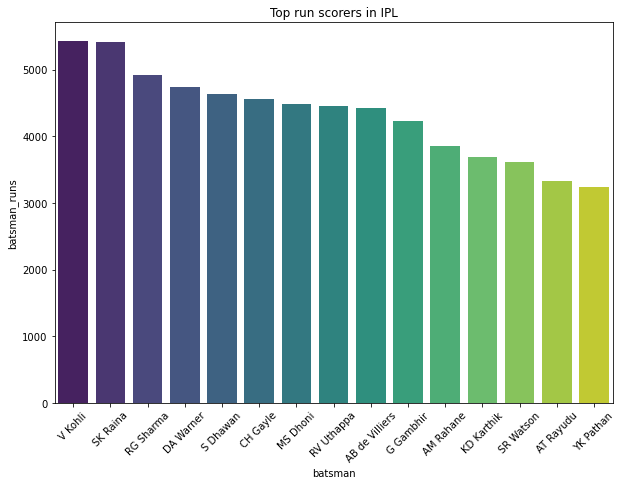

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_scorer_df.batsman,y=top_scorer_df.batsman_runs,palette='viridis')
plt.title('Top run scorers in IPL')
plt.xticks(rotation=45)
plt.show()

#### Virat Kohli is leading the chart followed by Raina. Gayle is the top scorer among foreign players.

#### Most runs scored in a Match by a batsman

In [39]:
batting_ings=df_deliv.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False).reset_index(drop=True)
batting_ings_sorted=batting_ings_sorted[:10] 

In [40]:
batting_ings_sorted

,match_id,batsman,Innings Runs
0,411,CH Gayle,175
1,60,BB McCullum,158
2,562,AB de Villiers,133
3,7935,RR Pant,130
4,620,AB de Villiers,129
5,372,CH Gayle,128
6,206,M Vijay,127
7,36,DA Warner,126
8,516,V Sehwag,122
9,7953,SR Watson,121


#### Chris Gayle has score the most runs in a single innings

In [41]:
batsman_ball_faced=df_deliv.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(batting_ings_sorted,batsman_ball_faced)

In [42]:
batsmen_performance

,match_id,batsman,Innings Runs,Balls Faced
0,411,CH Gayle,175,69
1,60,BB McCullum,158,77
2,562,AB de Villiers,133,61
3,7935,RR Pant,130,64
4,620,AB de Villiers,129,53
5,372,CH Gayle,128,62
6,206,M Vijay,127,57
7,36,DA Warner,126,60
8,516,V Sehwag,122,62
9,7953,SR Watson,121,60


#### We need to calculate strike rate to measure performance of batsman

In [43]:
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,df_deliv) 
batsmen_innings=batsmen_innings.iloc[:,1:10]
batsmen_innings=batsmen_innings.drop_duplicates()

In [44]:
batsmen_innings

,batsman,Innings Runs,Balls Faced,Strike Rate for Match,inning,batting_team,bowling_team,over,ball
0,CH Gayle,175,69,253.623188,1,Royal Challengers Bangalore,Pune Warriors,1,1
1,CH Gayle,175,69,253.623188,1,Royal Challengers Bangalore,Pune Warriors,1,2
2,CH Gayle,175,69,253.623188,1,Royal Challengers Bangalore,Pune Warriors,1,3
3,CH Gayle,175,69,253.623188,1,Royal Challengers Bangalore,Pune Warriors,2,1
4,CH Gayle,175,69,253.623188,1,Royal Challengers Bangalore,Pune Warriors,2,2
...,...,...,...,...,...,...,...,...,...
620,SR Watson,121,60,201.666667,2,Chennai Super Kings,Sunrisers Hyderabad,17,6
621,SR Watson,121,60,201.666667,2,Chennai Super Kings,Sunrisers Hyderabad,18,2
622,SR Watson,121,60,201.666667,2,Chennai Super Kings,Sunrisers Hyderabad,18,4
623,SR Watson,121,60,201.666667,2,Chennai Super Kings,Sunrisers Hyderabad,18,5


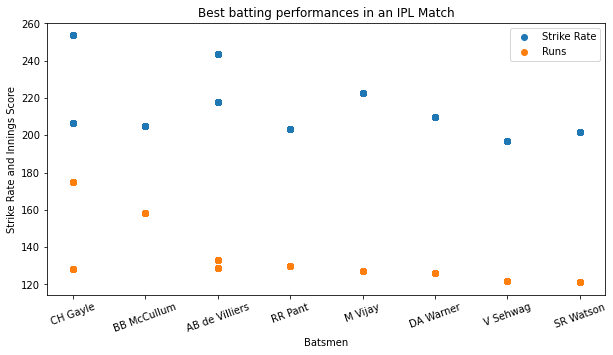

In [45]:
x=batsmen_innings['batsman']
y1=batsmen_innings['Strike Rate for Match']
y2=batsmen_innings['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('Batsmen')
plt.ylabel('Strike Rate and Innings Score')
plt.title('Best batting performances in an IPL Match')
plt.xticks(rotation=20)
plt.legend(['Strike Rate','Runs'])

Chris Gayle and AB de Villiers have appeared twice in the top run scorer list. Both have represented RCB.Followed by CHennai Super Kings with 2 players.

#### Players with more number of boundaries in IPL.

In [46]:
temp_df = df_deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10]
temp_df

,batsman,batsman_runs
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

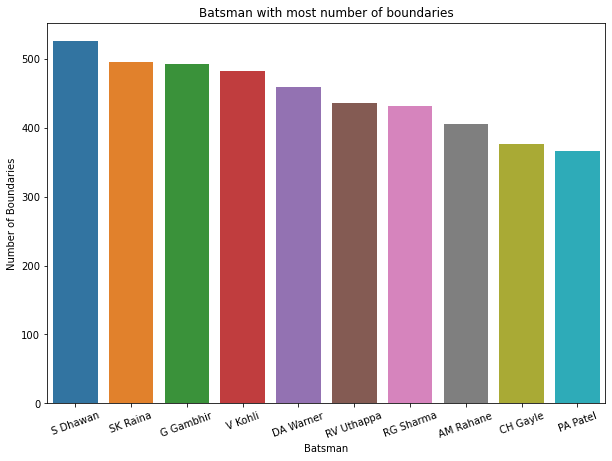

In [47]:
plt.figure(figsize=(10,7))
sns.barplot(x=temp_df.batsman,y=temp_df.batsman_runs)
plt.title('Batsman with most number of boundaries')
plt.xlabel('Batsman')
plt.ylabel('Number of Boundaries')
plt.xticks(rotation=20)

Shikhar Dhawan has the most number of boundaries(4's)

#### Batsmen with highest number of Sixes

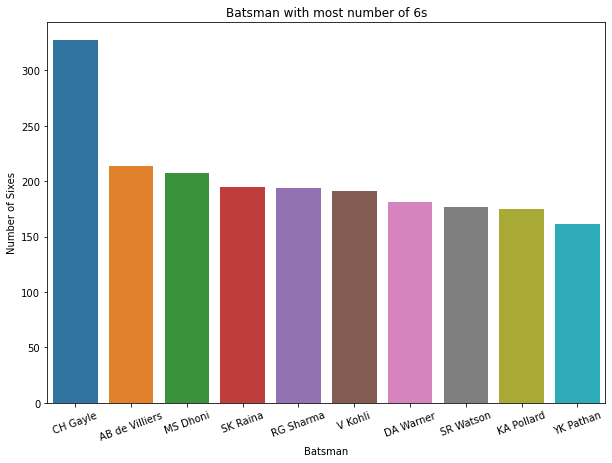

In [48]:
temp_df = df_deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10]

plt.figure(figsize=(10,7))
sns.barplot(x=temp_df.batsman,y=temp_df.batsman_runs)
plt.title('Batsman with most number of 6s')
plt.xlabel('Batsman')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=20)
plt.show()

As we can see Chris Gayle has the highest number of 6's. Significantly higher than AB de Villiers who has the 2nd highest

#### Batsman who has played the most number of dot balls.

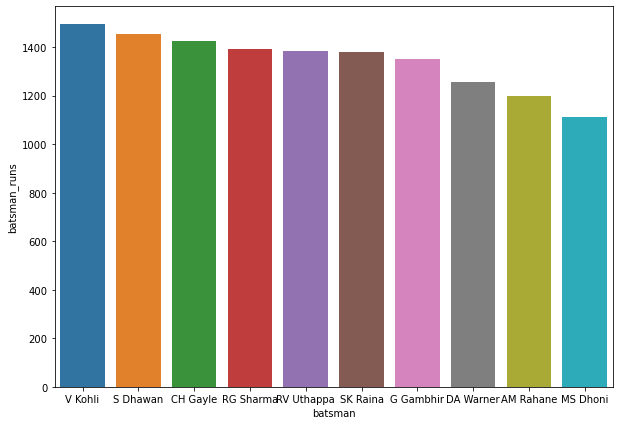

In [49]:
temp_df = df_deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10]

plt.figure(figsize=(10,7))
sns.barplot(x=temp_df.batsman,y=temp_df.batsman_runs)

Some of the same names repeat again here as well. It might be because these batsmen have played more number of balls so they have more dot balls as well.

#### Percentage distribution of dot balls

In [50]:
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = df_deliv.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index().sort_values(by='dot_balls',ascending=False)
temp_df = temp_df.iloc[(temp_df['balls_faced'] > 1000).values] #COnsidered batsman who have faced a reasonable number of balls
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10]

In [51]:
temp_df

,batsman,balls_faced,dot_balls,percentage_of_dot_balls
0,SC Ganguly,1326,662,49.924585
1,NV Ojha,1360,647,47.573529
2,AC Gilchrist,1555,737,47.395498
3,TM Dilshan,1047,492,46.991404
4,DR Smith,1803,832,46.145313
5,CH Gayle,3131,1423,45.448738
6,BB McCullum,2272,1022,44.982394
7,M Vijay,2164,959,44.316081
8,Yuvraj Singh,2207,967,43.815134
9,PA Patel,2444,1061,43.412439


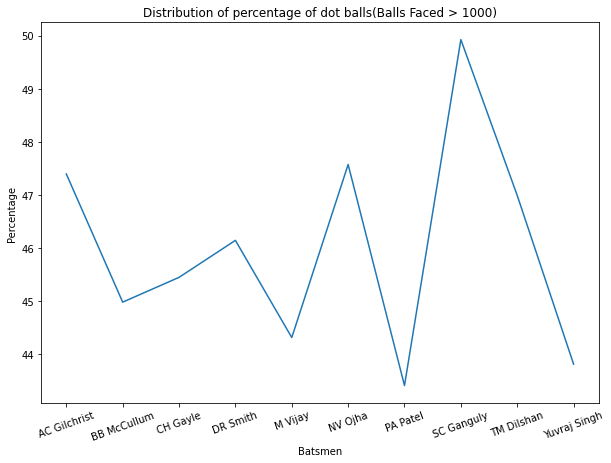

In [52]:
plt.figure(figsize=(10,7))
sns.lineplot(x=temp_df.batsman,y=temp_df.percentage_of_dot_balls)
plt.title('Distribution of percentage of dot balls(Balls Faced > 1000)')
plt.xlabel('Batsmen')
plt.ylabel('Percentage')
plt.xticks(rotation = 20)
plt.show()

Saurav Ganguly has the highest percentage of dot balls.Nearly 50 percent

#### Bowler Analysis

#### Bowlers who have taken the most number of wickets

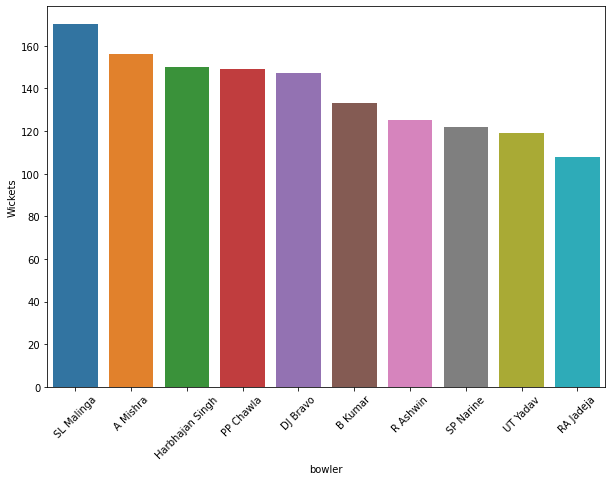

In [53]:
bowling_wickets=df_deliv[df_deliv['dismissal_kind']!='run out']
bowling_wickets=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wickets=bowling_wickets.groupby('bowler').count().reset_index()
bowling_top=bowling_wickets.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 

plt.figure(figsize=(10,7))
sns.barplot(x='bowler', y='Wickets',data=top_bowlers)
plt.xticks(rotation=45)
plt.show()

Lasith Malinga has taken the most number of wickets in IPL

#### Players who have bowled most the number of balls

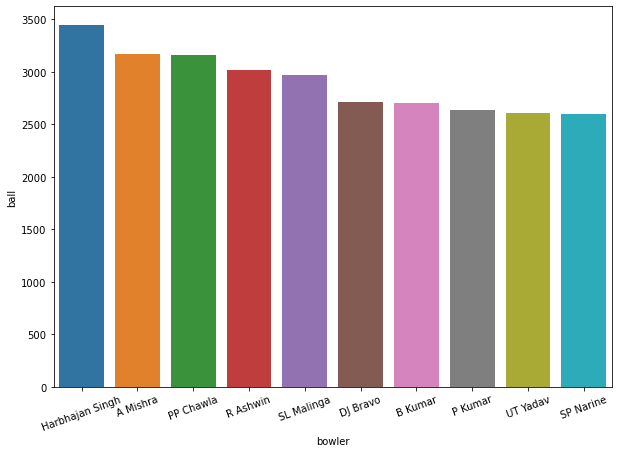

In [54]:
temp_df = df_deliv.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10]
temp_df

plt.figure(figsize=(10,7))
sns.barplot(x='bowler',y='ball',data=temp_df)
plt.xticks(rotation=20)
plt.show()

Harbhajan Singh has bowled the most number of balls in IPL history 

#### Bowlers with the most number of dot balls.

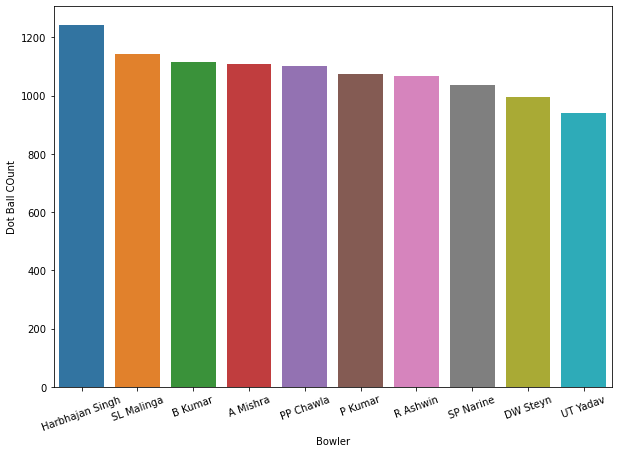

In [55]:
temp_df = df_deliv.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10]
temp_df


plt.figure(figsize=(10,7))
sns.barplot(x='bowler',y='total_runs',data=temp_df)
plt.xlabel('Bowler')
plt.ylabel('Dot Ball COunt')
plt.xticks(rotation=20)
plt.show()

Harbhajan SIngh has bowled the most number of dot balls

#### Players who have conceded most extra runs

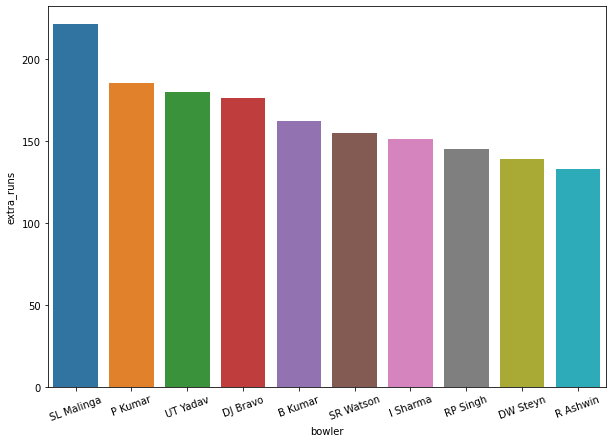

In [56]:
temp_df = df_deliv.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10]
temp_df

plt.figure(figsize=(10,7))
sns.barplot(x='bowler',y='extra_runs',data=temp_df)
plt.xticks(rotation=20)
plt.show()

SL Malinga has given the most extras

#### Most common dismissal types in IPL.

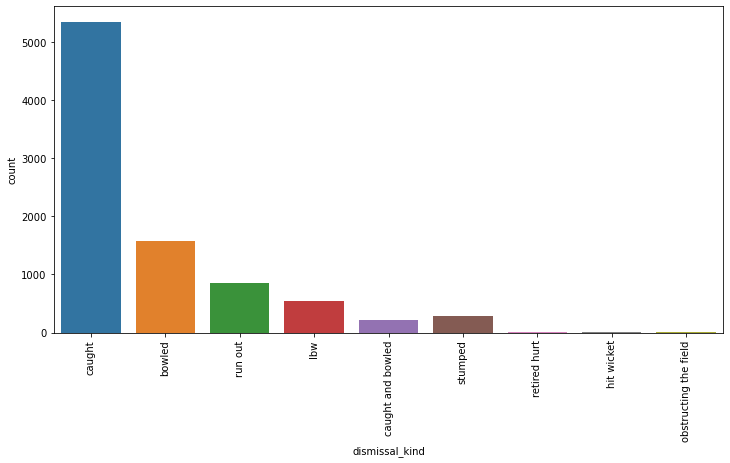

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=df_deliv)
plt.xticks(rotation='vertical')
plt.show()

Caught is the most common dismissal in IPL followed by Bowled. There are very few cases of hit wicket

#### Best fielders including wicketkeepers

In [58]:
fielder_list=df_deliv.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_count=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_count.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
fielder_list_count = fielder_list_count[:10]

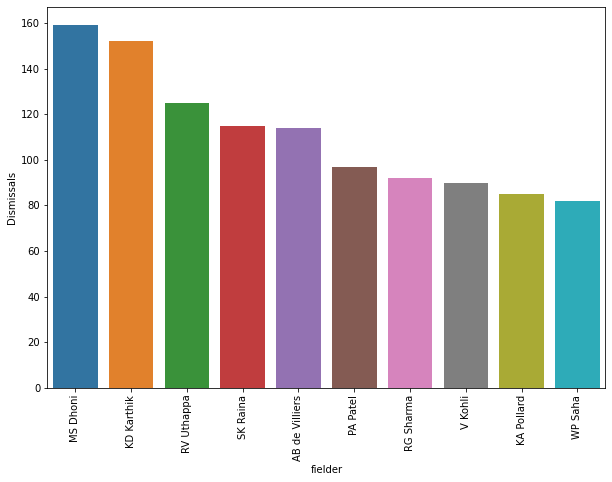

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(x='fielder',y='Dismissals',data=top_fielders)
plt.xticks(rotation='vertical')
plt.show()

MS Dhoni has th most dismissals under his name in IPL

### Win by Runs/Win by Wickets- Team wise Average

Text(0.5, 1.0, 'Average margin of victory by Runs/Wickets')

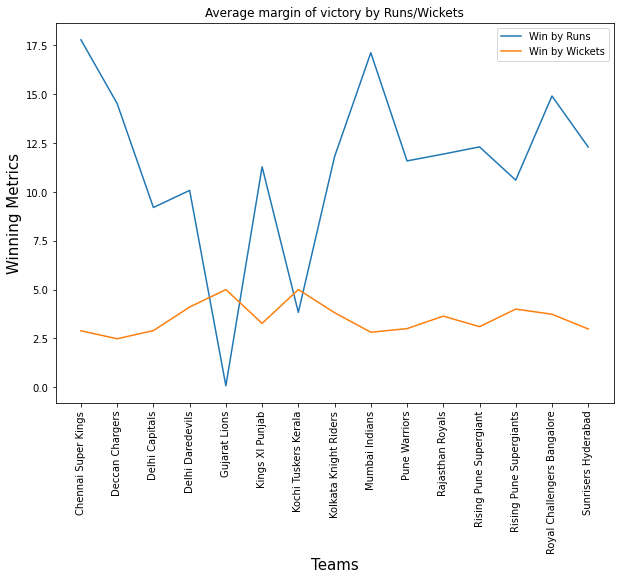

In [60]:
win_runs=df_match.groupby('winner').apply(lambda x:np.average(x['win_by_runs'])).reset_index(name='Win By Runs Average')
win_wickets=df_match.groupby('winner').apply(lambda x:np.average(x['win_by_wickets'])).reset_index(name='Win By Wickets Average')
plt.figure(figsize=(10,7))
plt.plot(win_runs['winner'],win_runs['Win By Runs Average'])
plt.plot(win_wickets['winner'],win_wickets['Win By Wickets Average'])
plt.xlabel('Teams',size=15)
plt.xticks(rotation='vertical')
plt.ylabel('Winning Metrics',size=15)
plt.legend(['Win by Runs','Win by Wickets'])
plt.title('Average margin of victory by Runs/Wickets')

CSK has the highest victory margin by runs followed by Mumbai Indians. Kochi Tuskers have highest average victory by 5 wickets even though they are not in IPL anymore.